In [1]:
def fetch_data(path: str) -> list[int]:
    """Read a file into bits"""
    with open(path, "rb") as df:
        lst = []
        for c in df.read():
            for b in f"{c:08b}":
                lst.append(int(b))
    return lst

## Redistribute the bytes in the data

In [2]:
import numpy as np

def split_data(bit_data: list[int], chunk_size: int = 4) -> np.ndarray:
    # Pad with zeroes at the end
    padding = (-len(bit_data)) % chunk_size
    bit_data.extend([0] * padding)

    bit_chunks = np.array(bit_data).reshape((-1, chunk_size)).astype(np.int8)
    bit_chunks = bit_chunks @ np.flip(1 << np.arange(chunk_size))

    return bit_chunks

## Plot histograms and show the difference

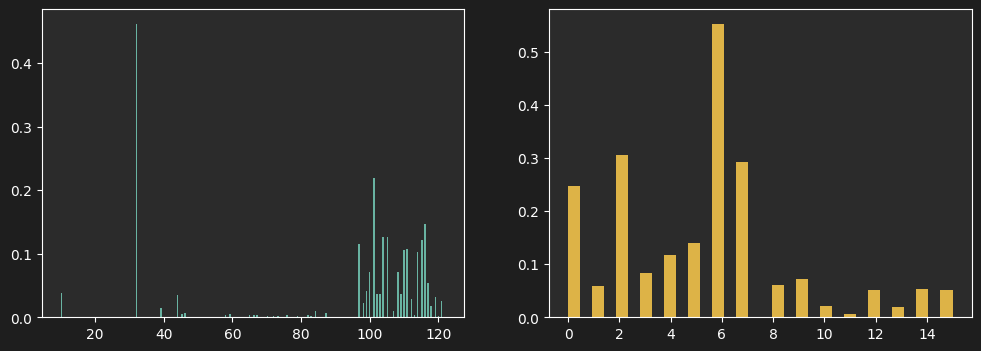

In [12]:
# Break the data set into chunks
chunk_size = 4
assert 0 < chunk_size <= 8

bit_data = fetch_data("input.txt")

data_set_8 = split_data(bit_data, 8)
data_set_n = split_data(bit_data, chunk_size)

# Plot the histograms
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.hist(data_set_8, bins=256, density=True, color='#69b3a2')
ax2.hist(data_set_n, bins=2 << chunk_size, density=True, color='#ddb347')

fig.patch.set_facecolor('#1e1e1e')
for ax in (ax1, ax2):
    ax.set_facecolor('#2b2b2b')
    ax.tick_params(colors='white')
    ax.spines[:].set_color('white')
    ax.title.set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
plt.show()